In [1]:
import urllib.request
import librosa
from IPython import display

file_name = "2976.mp3"  # Source: https://bigsoundbank.com/detail-2776-cockatiel-parakeet-8.html
url = f"https://bigsoundbank.com/UPLOAD/mp3/{file_name}"

urllib.request.urlretrieve(url, file_name)
sound_data, samplerate = librosa.load(file_name)  # sr=None keeps the original sample rate
print(samplerate)

display.display(display.Audio(data=sound_data, rate=samplerate))

22050


Sample Rate: 22050 Hz
Duration: 6.07 seconds


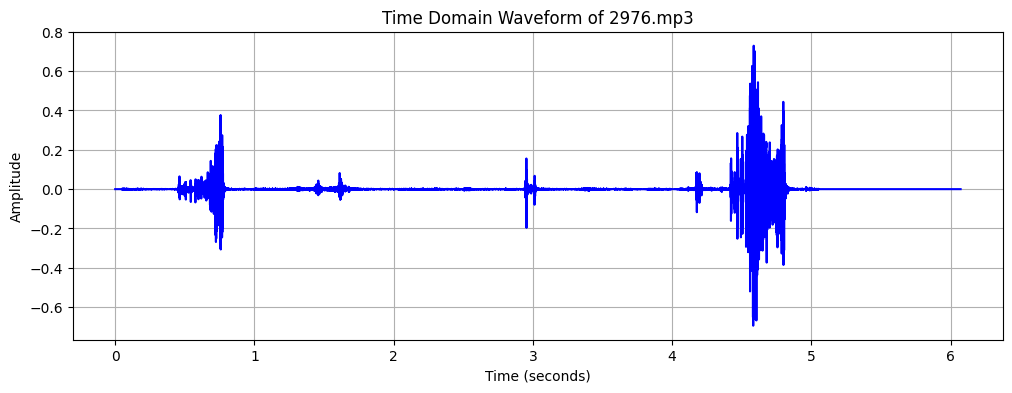

In [ ]:
import urllib.request
import librosa
import matplotlib.pyplot as plt
import numpy as np

# --- Setup ---
file_name = "2976.mp3"
url = f"https://bigsoundbank.com/UPLOAD/mp3/{file_name}"

# Download the file
print(f"Downloading {file_name}...")
urllib.request.urlretrieve(url, file_name)

# Load the sound data
sound_data, samplerate = librosa.load(file_name) 

print(f"Sample Rate: {samplerate} Hz")
print(f"Duration: {librosa.get_duration(y=sound_data, sr=samplerate):.2f} seconds")

# --- Plotting the Data in the Time Domain ---

# first time array > time array from 0 to duration of the sound > create evenly spaced numbers
time = np.linspace(0, len(sound_data) / samplerate, num=len(sound_data))

# plotting
plt.figure(figsize=(12, 4)) # Setting figure size
plt.plot(time, sound_data, color='b') # Plot the amplitude (sound_data) vs time
plt.title(f'Time Domain Waveform of {file_name}')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

Sample Rate: 22050 Hz
Processing N = 2205 samples with direct DFT...


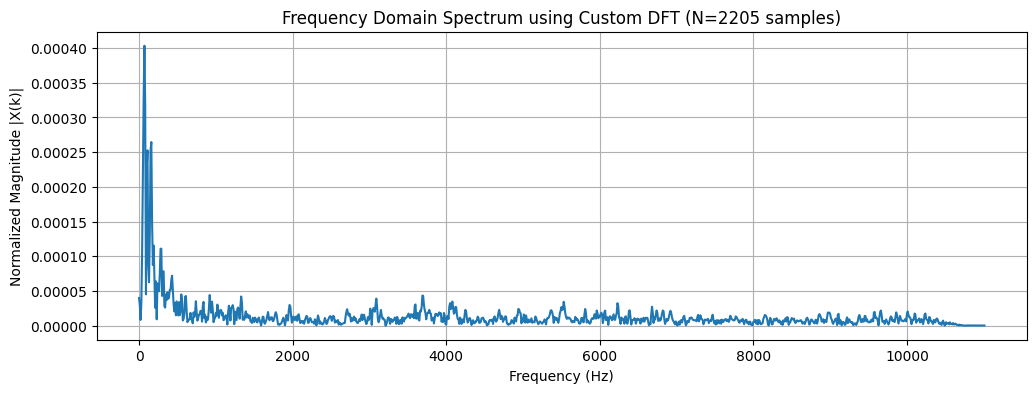

In [ ]:
#extra challenge:

import urllib.request
import librosa
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Setup (re-download and load data) ---
file_name = "2976.mp3"
url = f"https://bigsoundbank.com/UPLOAD/mp3/{file_name}"

print(f"Downloading {file_name}...")
urllib.request.urlretrieve(url, file_name)

# Load only a short snippet (0.1 seconds) for faster processing
sound_data, samplerate = librosa.load(file_name, duration=0.1) 
print(f"Sample Rate: {samplerate} Hz")

# Total number of sample points (N)
N = len(sound_data) 
print(f"Processing N = {N} samples with direct DFT...")

# --- 2. Custom DFT Function ---

def direct_dft(x):
    """Calculates DFT directly"""
    N = len(x)
    # k is the index for frequency (0 to N-1)
    k_indices = np.arange(N)
    # n is the index for time (0 to N-1)
    n_indices = np.arange(N)
    
    # Create the exponent matrix E[k, n] = e^(-i * 2 * pi * k * n / N)
    exponent_matrix = np.exp(-2j * np.pi * k_indices[:, None] * n_indices / N)
    
    # Matrix multiplication: [N x N] * [N x 1] -> [N x 1] 

    X_k = np.dot(exponent_matrix, x)
    
    return X_k


dft_output = direct_dft(sound_data)

# Calculate the frequency axis (xf)
T = 1.0 / samplerate # sample spacing
# The frequencies are from -fs/2 to fs/2, centered at 0
xf = np.fft.fftfreq(N, T)

# --- 4. Plot the Frequency ---

# Plotting the positive frequencies, analogous to the FFT plot
xf_positive = xf[:N//2]
dft_magnitude = 2.0/N * np.abs(dft_output[0:N//2]) # Calculate magnitude and normalize

plt.figure(figsize=(12, 4))
plt.plot(xf_positive, dft_magnitude)
plt.title(f'Frequency Domain Spectrum using Custom DFT (N={N} samples)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Normalized Magnitude |X(k)|')
plt.grid(True)
plt.show()